# Genshin Social Network Analysis
<hr>

# 0. Installations and Data Preparation

In [1]:
# pip install networkx
# pip install seaborn

In [2]:
import pandas as pd
import json
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
nodes = json.load(open('./data/node_list.json', 'rb'))
edges = json.load(open('./data/edge_list.json', 'rb'))

# 1. Directed Graph

## 1.1 Set-Up Directed Graph

In [4]:
DG = nx.DiGraph()

In [5]:
# add characters (nodes) with a nation attribute
[DG.add_node(n['id'], nation=n['nation']) for n in nodes];

In [6]:
# add ties (edges) between characters (nodes)
[DG.add_edge(edge['from'], edge['to'], type=edge['type']) for edge in edges];

### 1.1.1 Draw Directed Graph

In [7]:
# setting node colours for drawing
colour_mapping = {
    'Mondstadt': '#aff8db',
    'Liyue': '#ffcbc1',
    'Inazuma': '#d5aaff',
    'Snezhnaya': '#ace7ff'
}

In [8]:
node_colours = [colour_mapping[n[1]['nation']] if n[1]['nation']in colour_mapping.keys() else '#d1d1d1' for n in list(DG.nodes(data=True)) ]

In [9]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(DG, k=0.25, iterations=25)

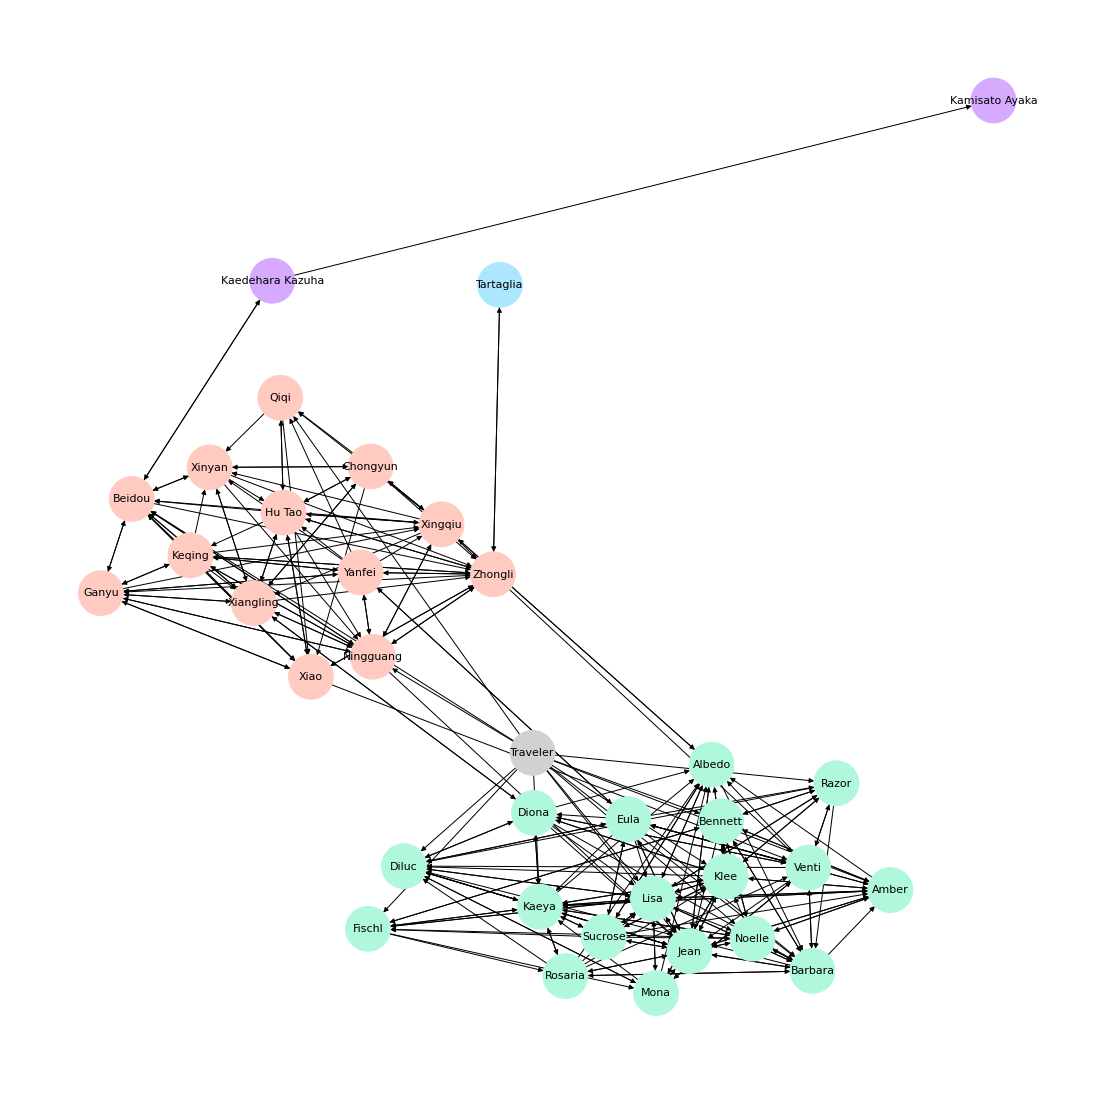

In [10]:
plt.figure(1,figsize=(15,15)) 
nx.draw(DG, 
        nodelist=DG.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colours,
        with_labels=True,
        font_size = 11,
        font_color='black')

# uncomment next line to save drawing as an image
# plt.savefig('directed.png')

plt.show()

In [11]:
DG.number_of_nodes()

35

In [12]:
DG.number_of_edges()

262

## 1.2 Node-Level Analysis

### 1.2.1 In-Degree Centrality

In [13]:
dir_nodes_df = pd.DataFrame(data=nodes, columns=['id', 'nation'])
dir_nodes_df['in_degree'] = dir_nodes_df['id'].apply(lambda n: DG.in_degree(n))
dir_nodes_df.sort_values('in_degree', ascending=False).head(10)

,id,nation,in_degree
34,Jean,Mondstadt,17
24,Lisa,Mondstadt,15
5,Kaeya,Mondstadt,13
6,Klee,Mondstadt,13
10,Diluc,Mondstadt,12
19,Barbara,Mondstadt,11
4,Zhongli,Liyue,11
16,Albedo,Mondstadt,11
15,Beidou,Liyue,10
12,Ningguang,Liyue,10


In [14]:
# average in-degree
dir_nodes_df['in_degree'].mean()

7.485714285714286

### 1.2.2 Out-Degree Centrality

In [15]:
dir_nodes_df['out_degree'] = dir_nodes_df['id'].apply(lambda n: DG.out_degree(n))
dir_nodes_df.sort_values('out_degree', ascending=False).head(10)

,id,nation,in_degree,out_degree
25,Traveler,NA,0,14
24,Lisa,Mondstadt,15,12
34,Jean,Mondstadt,17,11
5,Kaeya,Mondstadt,13,11
6,Klee,Mondstadt,13,11
14,Eula,Mondstadt,6,11
1,Keqing,Liyue,5,9
29,Diona,Mondstadt,6,9
8,Yanfei,Liyue,5,9
22,Hu Tao,Liyue,8,9


In [16]:
# average out-degree
dir_nodes_df['out_degree'].mean()

7.485714285714286

### 1.2.3 Distribution of in and out-degree centrality

<AxesSubplot:xlabel='out_degree', ylabel='count'>

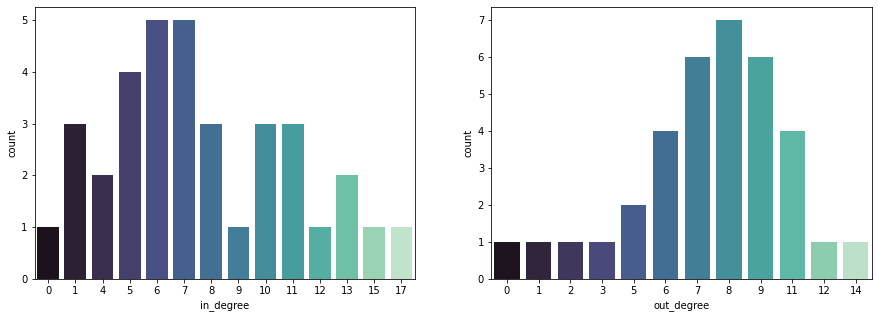

In [17]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.countplot(x='in_degree', data=dir_nodes_df, palette='mako', ax=ax[0])
sns.countplot(x='out_degree', data=dir_nodes_df, palette='mako', ax=ax[1])

### 1.2.4 PageRank Centrality

In [18]:
# calculate page rank centrality
pr = nx.pagerank(DG)

dir_nodes_df['page_rank'] = dir_nodes_df['id'].apply(lambda n: pr[n])
dir_nodes_df[['id', 'nation', 'page_rank']].sort_values('page_rank', ascending=False).head(10)

,id,nation,page_rank
34,Jean,Mondstadt,0.061477
24,Lisa,Mondstadt,0.055283
6,Klee,Mondstadt,0.046893
5,Kaeya,Mondstadt,0.046560
4,Zhongli,Liyue,0.042101
10,Diluc,Mondstadt,0.040697
16,Albedo,Mondstadt,0.040236
19,Barbara,Mondstadt,0.039043
17,Amber,Mondstadt,0.036527
15,Beidou,Liyue,0.033857


# 2. Undirected Graph

* 2 playable characters only know each other if the tie is recprioctaed
  * if there is a tie between A --> B and B --> A then can it be said that A and B know each other

## 2.1 Set-Up Undirected Graph

In [19]:
G = DG.to_undirected(reciprocal=True)

### 2.1.1 Draw Undirected Graph

In [20]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(G, k=0.25, iterations=25)
node_colours = [colour_mapping[n[1]['nation']] if n[1]['nation']in colour_mapping.keys() else '#d1d1d1' for n in list(G.nodes(data=True)) ]

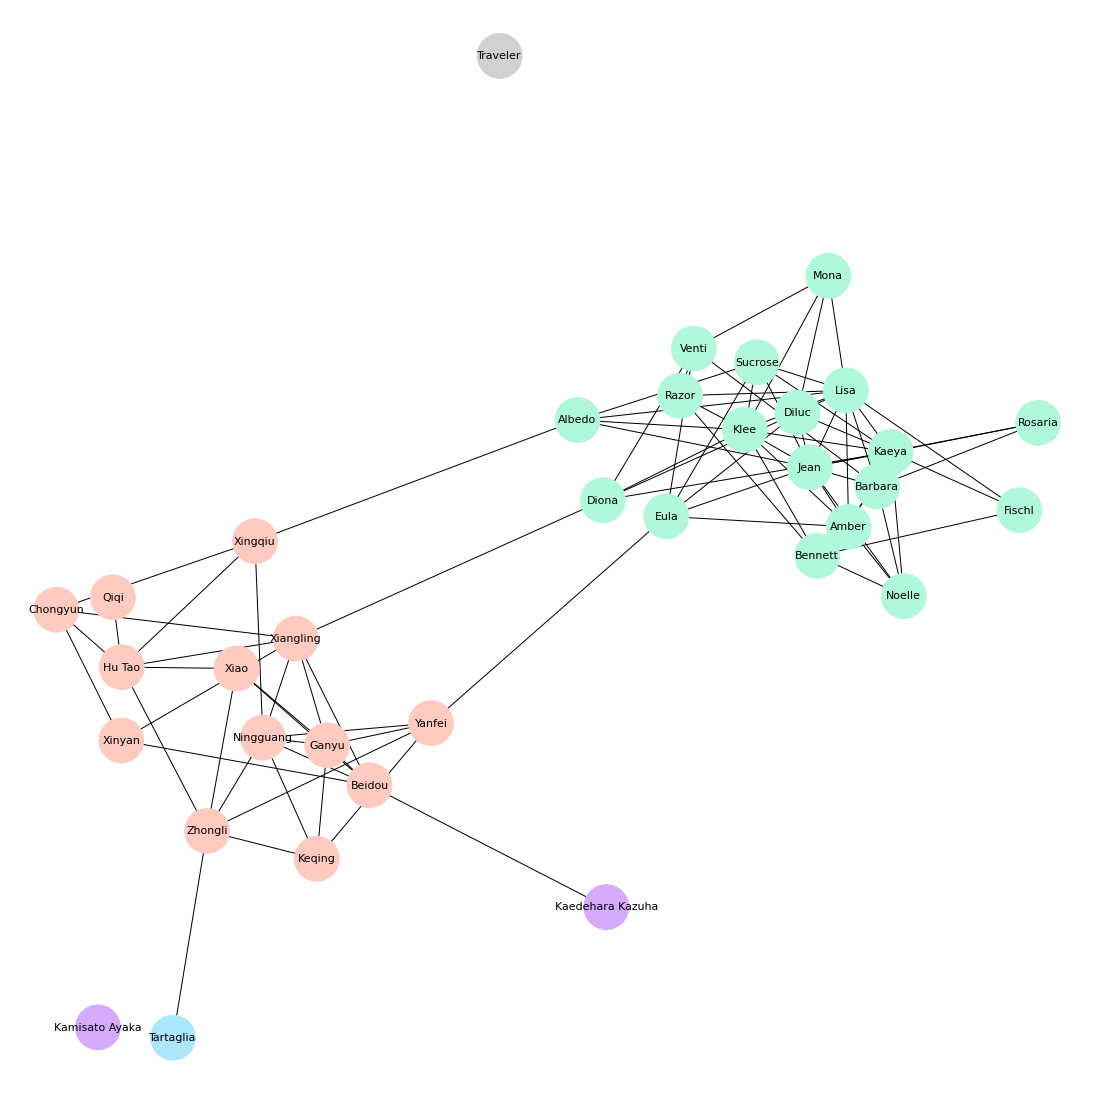

In [21]:
plt.figure(1,figsize=(15,15)) 
nx.draw(G, 
        nodelist=G.nodes,
        pos = pos,
        node_size=2000,
        node_color=node_colours,
        with_labels=True,
        font_size = 11,
        font_color='black')

# uncomment next line to save drawing as an image
# plt.savefig("undir_0.png", format="PNG")
plt.show()

### 2.1.2 Draw Undirected Graph without Isolates

In [22]:
# remove isolates from undirected graph
isolates = list(nx.isolates(G))
G.remove_nodes_from(isolates)

In [23]:
# position, so nodes in draw take on same positions, generally
pos = nx.spring_layout(G, k=0.25, iterations=20)

# recolour nodes
node_colours = [colour_mapping[n[1]['nation']] if n[1]['nation']in colour_mapping.keys() else '#d1d1d1' for n in list(G.nodes(data=True)) ]

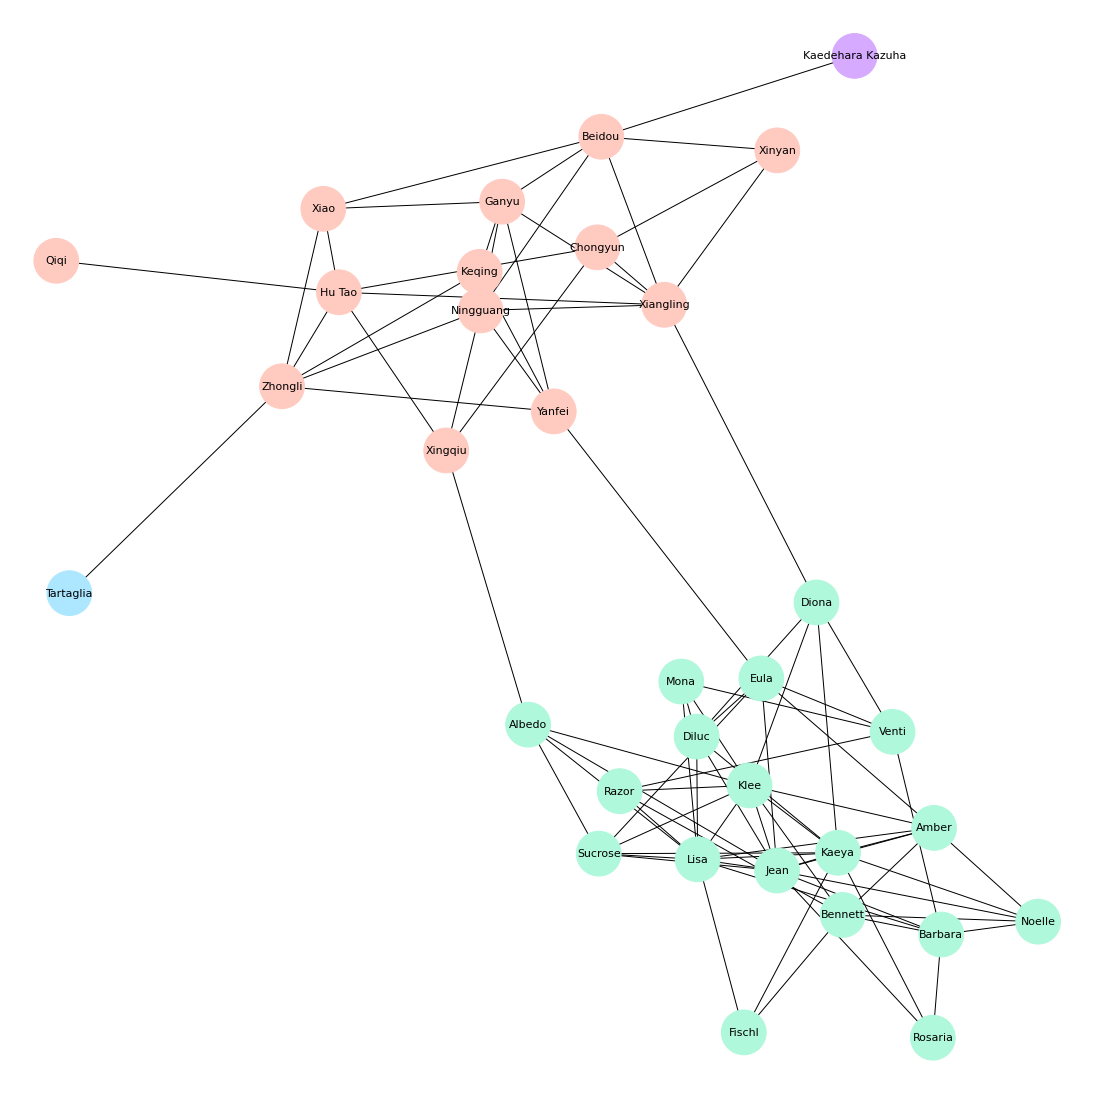

In [24]:
plt.figure(1,figsize=(15,15)) 
nx.draw(G, pos=pos, node_size=2000, node_color=node_colours, with_labels=True, font_size=11)

# uncomment line below to save drawing as an image
# plt.savefig("undirected_no_isolates.png", format="PNG")

In [25]:
G.number_of_nodes()

33

In [26]:
G.number_of_edges()

89

## 2.2 Node-Level Analysis

In [27]:
# initialise undirected network dataframe of characters
undir_df = dir_nodes_df[['id', 'nation']].copy()
undir_df = undir_df[~undir_df['id'].isin(isolates)]

### 2.2.1 Degree Centrality

In [28]:
undir_df['degree'] = undir_df['id'].apply(lambda n: len(G.edges(n)))
undir_df.sort_values('degree', ascending=False).head(10)

,id,nation,degree
34,Jean,Mondstadt,11
24,Lisa,Mondstadt,11
5,Kaeya,Mondstadt,10
6,Klee,Mondstadt,10
12,Ningguang,Liyue,7
17,Amber,Mondstadt,7
3,Xiangling,Liyue,7
4,Zhongli,Liyue,6
15,Beidou,Liyue,6
2,Bennett,Mondstadt,6


### 2.2.2 Closeness Centrality

In [29]:
close_cen = nx.closeness_centrality(G)
# close_cen = dict(sorted(close_cen.items(), key=lambda item: item[1], reverse=True))
undir_df['closeness'] = undir_df['id'].apply(lambda n: close_cen[n])
undir_df.sort_values('closeness', ascending=False).head(10)

,id,nation,degree,closeness
29,Diona,Mondstadt,5,0.470588
3,Xiangling,Liyue,7,0.450704
34,Jean,Mondstadt,11,0.438356
16,Albedo,Mondstadt,5,0.438356
14,Eula,Mondstadt,6,0.438356
6,Klee,Mondstadt,10,0.432432
5,Kaeya,Mondstadt,10,0.426667
8,Yanfei,Liyue,5,0.421053
10,Diluc,Mondstadt,6,0.421053
13,Xingqiu,Liyue,4,0.421053


### 2.2.3 Betweenness Centrality

In [30]:
# calcuate betweenness centrality for each character 
bet_cen = nx.betweenness_centrality(G)

undir_df['betweenness'] = undir_df['id'].apply(lambda n: bet_cen[n])
undir_df.sort_values('betweenness', ascending=False).head(10)

,id,nation,degree,closeness,betweenness
3,Xiangling,Liyue,7,0.450704,0.220138
29,Diona,Mondstadt,5,0.470588,0.206497
14,Eula,Mondstadt,6,0.438356,0.164256
8,Yanfei,Liyue,5,0.421053,0.148855
16,Albedo,Mondstadt,5,0.438356,0.102882
13,Xingqiu,Liyue,4,0.421053,0.101402
22,Hu Tao,Liyue,6,0.385542,0.100667
5,Kaeya,Mondstadt,10,0.426667,0.087692
4,Zhongli,Liyue,6,0.363636,0.086822
6,Klee,Mondstadt,10,0.432432,0.083374


### 2.2.4 Eigenvector Centrality

In [31]:
# calculate each character's eigenvector centrality
eigen_cen = nx.eigenvector_centrality(G)

undir_df['eigen'] = undir_df['id'].apply(lambda n: eigen_cen[n])
undir_df[['id','nation','degree','eigen']].sort_values('eigen', ascending=False).head(10)

,id,nation,degree,eigen
34,Jean,Mondstadt,11,0.380021
24,Lisa,Mondstadt,11,0.369083
5,Kaeya,Mondstadt,10,0.343876
6,Klee,Mondstadt,10,0.343121
17,Amber,Mondstadt,7,0.279945
21,Sucrose,Mondstadt,6,0.254812
10,Diluc,Mondstadt,6,0.220802
16,Albedo,Mondstadt,5,0.194347
31,Noelle,Mondstadt,5,0.193503
19,Barbara,Mondstadt,6,0.192033


# 3. Overall Analysis

In [32]:
# initialise ranking dataframe
ranked_df = undir_df[['id', 'nation']].copy()


In [33]:
undir_df = undir_df.sort_values('degree', ascending=False)
ranked_df['degree_rank'] = undir_df['degree'].rank(method='first', ascending=False).astype(int)


In [34]:
# add rank of characters based on different undirected network centrality values
undir_df = undir_df.sort_values('closeness', ascending=False)
ranked_df['closeness_rank'] = undir_df['closeness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('betweenness', ascending=False)
ranked_df['betweenness_rank'] = undir_df['betweenness'].rank(method='first', ascending=False).astype(int)

undir_df = undir_df.sort_values('eigen', ascending=False)
ranked_df['eigen_rank'] = undir_df['eigen'].rank(method='first', ascending=False).astype(int)

In [35]:
# add average rank column
ranked_df['average_rank'] = ranked_df.mean(numeric_only=True, axis=1)
ranked_df.sort_values('average_rank')

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
34,Jean,Mondstadt,1,3,11,1,4.00
5,Kaeya,Mondstadt,3,7,8,3,5.25
6,Klee,Mondstadt,4,6,10,4,6.00
24,Lisa,Mondstadt,2,12,14,2,7.50
3,Xiangling,Liyue,7,2,1,21,7.75
14,Eula,Mondstadt,15,4,3,11,8.25
16,Albedo,Mondstadt,17,5,5,8,8.75
29,Diona,Mondstadt,21,1,2,13,9.25
17,Amber,Mondstadt,6,15,17,5,10.75
21,Sucrose,Mondstadt,12,11,20,6,12.25


In [36]:
ranked_df

,id,nation,degree_rank,closeness_rank,betweenness_rank,eigen_rank,average_rank
0,Xinyan,Liyue,30,28,27,29,28.50
1,Keqing,Liyue,22,24,29,28,25.75
2,Bennett,Mondstadt,10,22,22,12,16.50
3,Xiangling,Liyue,7,2,1,21,7.75
4,Zhongli,Liyue,8,19,9,25,15.25
5,Kaeya,Mondstadt,3,7,8,3,5.25
6,Klee,Mondstadt,4,6,10,4,6.00
7,Mona,Mondstadt,24,26,25,14,22.25
8,Yanfei,Liyue,18,9,4,19,12.50
9,Chongyun,Liyue,25,21,23,27,24.00
